In [1]:
import cv2
import matplotlib.pyplot as plt
import Aug

import pipe_example
import utils

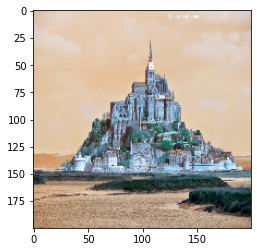

In [2]:
novas_imagens = 30
aux = cv2.imread('ibagem.jpg',cv2.IMREAD_COLOR)
#aux = cv2.imread('ibagem.jpg',cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(aux, (200, 200))
plt.imshow(img_array, cmap='gray')
plt.show()

In [3]:
pipe = pipe_example.pipe
pipe.print_pipe()

Operações:
|    Operação    | prob | skew_type | magnitude |
|      Skew      |  1   |   RANDOM  |    0.9    |

| -------------- | prob |
|     Invert     |  1   |

| -------------- | prob | min_factor | max_factor |
|     Brilho     |  1   |    0.1     |     10     |

| -------------- | prob | min_factor | max_factor |
|     Color      |  1   |    -20     |     20     |

| -------------- | prob | min_factor | max_factor |
|    Contrast    |  1   |     -5     |     5      |

| -------------- | prob | top_bottom_left_right |
|      Flip      |  1   |         RANDOM        |

| -------------- | prob | max_shear_left | max_shear_right |
|     Shear      |  1   |       30       |        30       |

| -------------- | prob | grid_width | grid_height | magnitude |
|    Distort     |  1   |     4      |      4      |     8     |

| -------------- | prob | min_factor | max_factor |
|      Zoom      |  1   |     1      |     9      |

| -------------- | prob | percentage_area | randomise |
|  Z

In [4]:
image = img_array
lista_de_imagens = []

Numero imagens - 30


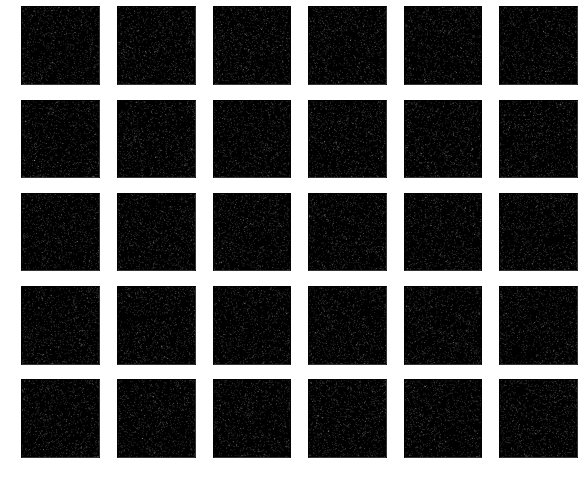

In [5]:
lista_de_imagens = pipe.operar(image, vezes = novas_imagens)
utils.print_list_img(lista_de_imagens)

In [6]:
for i in range( 13 ):
    pipe.remove()
pipe.print_pipe()

Operações:
|    Operação    | prob | skew_type | magnitude |
|      Skew      |  1   |   RANDOM  |    0.9    |

| -------------- | prob |
|     Invert     |  1   |

| -------------- | prob | min_factor | max_factor |
|     Brilho     |  1   |    0.1     |     10     |

| -------------- | prob | min_factor | max_factor |
|     Color      |  1   |    -20     |     20     |




Numero imagens - 30


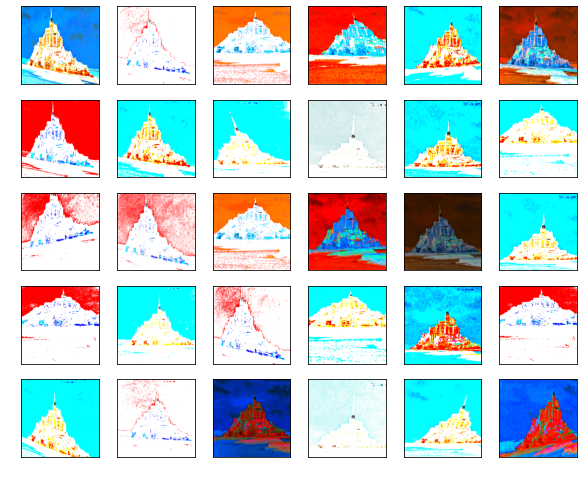

In [7]:
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, vezes = novas_imagens)
utils.print_list_img(lista_de_imagens)

In [8]:
pipe.remove(1)
pipe.print_pipe()

Operações:
|    Operação    | prob | skew_type | magnitude |
|      Skew      |  1   |   RANDOM  |    0.9    |

| -------------- | prob | min_factor | max_factor |
|     Brilho     |  1   |    0.1     |     10     |

| -------------- | prob | min_factor | max_factor |
|     Color      |  1   |    -20     |     20     |




In [9]:
pipe.replace(0, Aug.Contrast(prob=0.9, min_factor=-5, max_factor=5) )
pipe.replace(1, Aug.Flip(prob=0.5))
pipe.add(Aug.Zoom_Random(prob=0.5, percentage_area=0.5, randomise=True))
pipe.print_pipe()

Operações:
|    Operação    | prob | min_factor | max_factor |
|    Contrast    | 0.9  |     -5     |     5      |

| -------------- | prob | top_bottom_left_right |
|      Flip      | 0.5  |         RANDOM        |

| -------------- | prob | min_factor | max_factor |
|     Color      |  1   |    -20     |     20     |

| -------------- | prob | percentage_area | randomise |
|  Zoom_Random   | 0.5  |       0.5       |    True   |




Numero imagens - 30


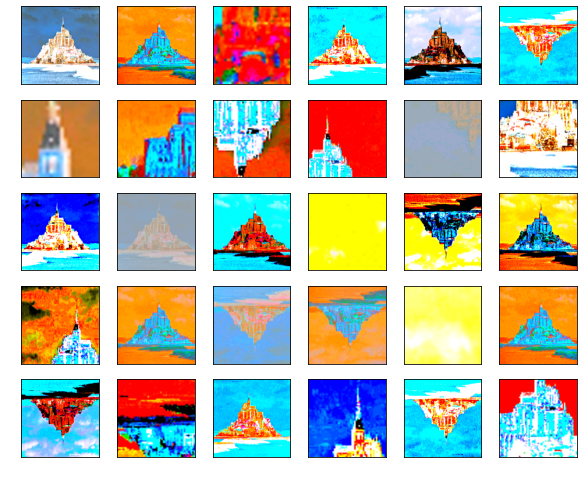

In [10]:
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, vezes = novas_imagens)
utils.print_list_img(lista_de_imagens)